## Load MNIST on Python 3.x

In [253]:
import pickle
import gzip

In [254]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [255]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [256]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

## Functions for Multiclass Logistic Regression

In [257]:
def get_activation(X,W):
    return np.dot(np.transpose(W),X);
def get_model(A):
    exp_A = np.exp(A);
    #print(exp_A[0]);
    #print(np.shape(exp_A));
    sum_exp = np.sum(exp_A); 
    #print(exp_A);
    #print(sum_exp);
    for i in range(len(exp_A)):
        exp_A[i] = exp_A[i]/sum_exp;
    #print(exp_A);
    #print(sum(exp_A));
    return exp_A;
def get_hot_target(t,y):
    i=0;
    for j in t:
        a = y[i]
        j[a] = j[a] + 1;
        i = i+1
    return t
def get_cross_entropy(X,W,Y):
    a = np.dot(X,W);
    exp_a = np.exp(a);
    sum_ex = 0;
    for i in exp_a:
        sum_ex = np.sum(i);
        for j in range(len(i)):
            i[j] = i[j]/sum_ex;
        #print(np.sum(i));
    #print(np.shape(exp_a));
    k=0;
    count = 0;
    for i in exp_a:
        j = np.argmax(i);
        if(j == Y[k]):
            count = count+1;
        k = k+1;
        
    #Loss = 0
    #ln_y = -np.log(exp_a);
    #i=0;
    #for j in ln_y:
    #    x = Y[i];
    #    Loss = Loss + j[x];
    #    i=i+1;
    #print(len(X));
    #return (1/len(X))*Loss,float((count*100)/len(X));
    return float((count*100)/len(X));
    #return 0;

## Loading training, validation and testing data for MNIST

In [258]:
Mtraining_data = np.array(training_data[0]);
Mtraining_target = np.array(training_data[1]);
Mvalidation_data = np.array(validation_data[0]);
Mvalidation_target = np.array(validation_data[1]);
Mtest_data = np.array(test_data[0]);
Mtest_target = np.array(test_data[1]);
print("Shapes of MNIST training data: ");
print(np.shape(Mtraining_data));
print(np.shape(Mtraining_target));
#print(Mtraining_target);
print("Shapes of MNIST validation data: ");
print(np.shape(Mvalidation_data));
print(np.shape(Mvalidation_target));
print("Shapes of MNIST testing data: ");
print(np.shape(Mtest_data));
print(np.shape(Mtest_target));

Shapes of MNIST training data: 
(50000, 784)
(50000,)
Shapes of MNIST validation data: 
(10000, 784)
(10000,)
Shapes of MNIST testing data: 
(10000, 784)
(10000,)


## Loading training, validation and testing data for USPS

In [259]:
print("Shapes of USPS testing data: ");
print(np.shape(USPSMat))
print(np.shape(USPSTar))

Shapes of USPS testing data: 
(19999, 784)
(19999,)


In [260]:
'''
Weights = np.random.rand(784,10);
t_values = np.zeros((50000,10));
t_values = get_hot_target(t_values,Mtraining_target);
print("Shape of tvalues :");
print(np.shape(t_values))
Activation = get_activation(Mtraining_data,Weights);
print("Shape of Activation :");
print(np.shape(Activation));
Model = get_model(Activation);
print("Shape of Model :");
print(np.shape(Model));
cost = get_cross_entropy(Model, Mtraining_target);
print("Cross entropy loss:")
print(cost);
'''

'\nWeights = np.random.rand(784,10);\nt_values = np.zeros((50000,10));\nt_values = get_hot_target(t_values,Mtraining_target);\nprint("Shape of tvalues :");\nprint(np.shape(t_values))\nActivation = get_activation(Mtraining_data,Weights);\nprint("Shape of Activation :");\nprint(np.shape(Activation));\nModel = get_model(Activation);\nprint("Shape of Model :");\nprint(np.shape(Model));\ncost = get_cross_entropy(Model, Mtraining_target);\nprint("Cross entropy loss:")\nprint(cost);\n'

## Gradient descent calculation

In [278]:
Weights = np.random.rand(784,10);
t_values = np.zeros((50000,10));
La = 2;
learning_rate = 0.0012;
t_values = get_hot_target(t_values,Mtraining_target);
print("Shape of tvalues :");
print(np.shape(t_values));
L = [];
A = [];
ite =[];
for i in tqdm_notebook(range(0,2500)):
    Activation = get_activation(Mtraining_data[i],Weights);
    #print("Shape of Activation :");
    #print(np.shape(Activation));
    Model = get_model(Activation);
    #print("Shape of Model :");
    #print(np.shape(Model));
    #cost = get_cross_entropy(Model, Mtraining_target);
    #print("Cross entropy loss:")
    #print(cost);
    #print(np.shape(np.transpose(Mtraining_data[i])));
    x = np.transpose(np.array([Mtraining_data[i]]));
    y = np.transpose(np.array([Model-t_values[i]]));
    Delta_EW =  np.dot(y,np.transpose(x));
    La_Delta_EW  = np.dot(La,Weights);
    Delta_E = np.add(Delta_EW, np.transpose(La_Delta_EW));
    #print(np.shape(Delta_E));
    Delta_W = -np.dot(learning_rate,Delta_E);
    #print(Weights);
    #print(Delta_EW);
    W_next = Weights + np.transpose(Delta_W);
    #print(np.shape(W_next));
    Weights = W_next;
    #print(W_next);
    accuracy = get_cross_entropy(Mtraining_data,Weights,Mtraining_target);
    #L.append(Loss);
    A.append(accuracy);
    ite.append(i);


Shape of tvalues :
(50000, 10)


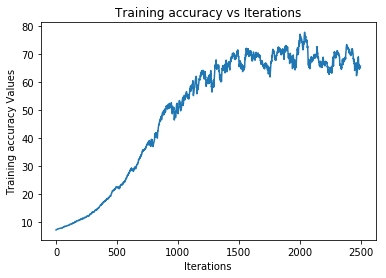

65.728


In [281]:
'''
plt.plot(ite, L) 
plt.xlabel('Iterations') 
plt.ylabel('cross entropy training Values')   
plt.title('cross entropy training vs Iterations') 
plt.show()
'''
plt.plot(ite, A) 
plt.xlabel('Iterations') 
plt.ylabel('Training accuracy Values')   
plt.title('Training accuracy vs Iterations') 
plt.show()
print(A[2499]);